### The layer `orientation`

Some geoms treat each axis differently and, thus, can thus have two orientations.

The `orientation` parameter specifies the axis that the layer' stat and geom should run along (x-axis by default). 


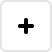
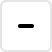
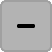
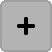
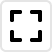
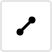
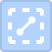
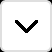
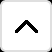
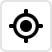

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

### geom_bar()

In [2]:
mpg = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")

base = ggplot(mpg) + ggsize(800, 300) + theme(axis_title_x='blank')
manufacturer_mapping = as_discrete('manufacturer', order_by='..count..')

In [3]:
# orientation "x" (default) : "manufacturer" is mapped to the x-axis.
orientation_x = base + geom_bar(aes(x=manufacturer_mapping, fill='class'), color='white')
orientation_x

In [4]:
orientation_x + coord_flip()

In [5]:
# orientation "y" : "manufacturer" is mapped to the y-axis.
base + geom_bar(aes(y=manufacturer_mapping, fill='class'), color='white', orientation="y")

In [6]:
#
# Density estimates.
#

np.random.seed(0)

cov0=[[1, -.8], 
     [-.8, 1]]     
cov1=[[ 10, .1],
       [.1, .1]]

x0, y0 = np.random.multivariate_normal(mean=[-2,0], cov=cov0, size=200).T
x1, y1 = np.random.multivariate_normal(mean=[0,1], cov=cov1, size=200).T

data = dict(
    x = np.concatenate((x0,x1)),
    y = np.concatenate((y0,y1)),
    c = ["A"]*200 + ["B"]*200
)

In [7]:
p = ggplot(data, aes("x", "y", color="c")) + geom_point()
p

### `geom_density()`

In [8]:
p + geom_density(size=2)

In [9]:
p + geom_density(size=2, orientation="y")

### `geom_histogram()`

In [10]:
p + geom_histogram(fill="rgba(0,0,0,0)")

In [11]:
p + geom_histogram(alpha=0, orientation="y", show_legend=False)

In [12]:
p + geom_freqpoly(size=2)

In [13]:
p + geom_freqpoly(size=2, orientation="y")

### `geom_smooth()`

In [14]:
p + geom_smooth()

In [15]:
p + geom_smooth() + coord_flip()

In [16]:
p + geom_smooth(orientation="y")

### `geom_boxplot()`

In [17]:
p + geom_boxplot(x=-7, color="black", alpha=0)

In [18]:
p + geom_boxplot(y=-2, color="black", alpha=0, orientation="y")

### `geom_violin()`

In [19]:
p + geom_violin(x=-7, color="black", alpha=0)

In [20]:
p + geom_violin(y=-2, color="black", alpha=0, orientation="y")

In [21]:
p + geom_violin(aes(fill="c"), y=-2, color="black", 
                alpha=0.3, position="identity", width=3, show_legend=False,
                orientation="y")